# Practice 1.1: Classical Neural Networks
MQIST 2025/26: Quantum Computing and Machine Learning
Alfredo Chavert Sancho
Pedro Herrero Maldonado

In [1]:
'Package Imports'
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras 
from keras import layers
from keras.datasets import fashion_mnist

### Auxiliary functions

In [15]:
import matplotlib.pyplot as plt

def plot(axis, train, validation, title):
    # We create a list of epoch numbers from 1 to the length of the training set
    epochs = range(1, len(train) + 1)
    # Graph of the training data with a solid blue line
    axis.plot(epochs, train, 'b-o', label='Training ' + title)
    # Graph of the validation data with a red dashed line
    axis.plot(epochs, validation, 'r--o', label='Validation '+ title)
    # We set the title of the graph, the X and Y axis labels
    axis.set_title('Training and validation ' + title)
    axis.set_xlabel('Epochs')
    axis.set_ylabel(title)
    # We show the legend of the graph
    axis.legend()    

def multiplot(history):
    fig, axes = plt.subplots(1, 2)
    fig.set_figwidth(11)
    plot(axes[0], history.history['loss'], history.history['val_loss'], 'loss')
    plot(axes[1], history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

    # We show the graphs on screen
    plt.show()

from sklearn.metrics import classification_report

def print_report(model):
    '''Generates and prints a classification report for the given model on the test dataset.'''
    # Predict the classes for the test set
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)
    # Generate the classification report
    report = classification_report(test_labels, predicted_classes, target_names = ['T-shirt/top', 
                                                                                    'Trouser', 
                                                                                    'Pullover', 
                                                                                    'Dress', 
                                                                                    'Coat', 
                                                                                    'Sandal', 
                                                                                    'Shirt', 
                                                                                    'Sneaker', 
                                                                                    'Bag', 
                                                                                    'Ankle boot'])
    # Print the evaluation metrics
    print ("Classification Report:")
    print (report)

# Data loading and preprocessing

In [3]:
'Load the Fashion-MNIST dataset'
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Flatten the data

In [4]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

### Converting [0,255] integers to [0,1] floats

In [5]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### One hot encoding

In [6]:
train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels) # Not needed for categorical_accuracy

### Divide the train data into train and validation sets

In [7]:
val_images = train_images[:10000]
val_labels = train_labels[:10000]
train_images = train_images[10000:]
train_labels = train_labels[10000:]

# Classical Neural Network Setup

In this section, we define the architecture of our classical neural network model. The model consists of an input layer, various hidden layers with activation functions, and an output layer with softmax activation for multi-class classification. The main goal of this section, in terms of performance, is to achieve the highest possible accuracy on the validation dataset even if the model overfits the training data.

This issue will be later addressed in the next part of the practice, where we will implement regularization techniques to improve the model's generalization capabilities.

### Structural hyperparameters
We will use the following structural hyperparameters for our classical neural network:
- Number of hidden layers: **2**
- Number of neurons per hidden layer: **100**
- Activation function: **relu**

The justification for these choices is as follows:
- **Number of hidden layers**:  two hidden layers provide enough capacity to learn teh patterns on this simple dataset without making the model too complex.
- **Number of neurons per hidden layer**: 100 neurons achive overfitting on the training data,, this is the main goal of this part of the practice, this overfitting will be addresed in the next part.
- **Activation function**: relu is chosen for its ability to introduce non-linearity and help the network learn complex patterns without suffering from vanishing gradient problems.

### Learning hyperparameters
We will use the following learning hyperparameters for our classical neural network:
- Learning rate: 0.001
- Batch size: 200
- Number of epochs: 40
- Optimizer: Adam
- Loss function: Categorical Crossentropy

The justification for these choices is as follows:
- **Learning rate**: A learning rate of 0.001 allows for gradual convergence to the optimal weights without overshooting.
- **Batch size**: A batch size of 200 balances memory efficiency and gradient estimation accuracy.
- **Number of epochs**: Training for 40 epochs provides enough iterations for the model to learn the data patterns, while monitoring for overfitting.
- **Optimizer**: The Adam optimizer is chosen for its adaptive learning rate capabilities, which help in faster convergence.
- **Loss function**: Categorical crossentropy is appropriate for multi-class classification tasks like Fashion-MNIST.

In [8]:
model = keras.Sequential(name='fashion_mnist')
# Input layer
model.add(layers.Input(shape=(28*28, )))
# Hidden layers
model.add(layers.Dense(100, name='hidden_1', activation='relu')) 
model.add(layers.Dense(100, name='hidden_2', activation='relu')) 
# Output layer
model.add(layers.Dense(10, name='output', activation='softmax'))

model.summary()

Model: "fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

The learning hyperparameters are the following:

In [9]:
learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate = learning_rate)
loss_function = "categorical_crossentropy"
model.compile(optimizer = opt, loss = loss_function, metrics = ["accuracy"])
epochs = 40
batch_size = 200

Now the neural network is ready to be trained using the specified learning hyperparameters and tested with validation data 

In [10]:
history = model.fit(train_images,
                    train_labels,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (val_images, val_labels))

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7862 - loss: 0.6279 - val_accuracy: 0.8385 - val_loss: 0.4624
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8514 - loss: 0.4245 - val_accuracy: 0.8552 - val_loss: 0.4098
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8658 - loss: 0.3770 - val_accuracy: 0.8693 - val_loss: 0.3684
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8751 - loss: 0.3488 - val_accuracy: 0.8743 - val_loss: 0.3511
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8833 - loss: 0.3253 - val_accuracy: 0.8800 - val_loss: 0.3338
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8888 - loss: 0.3114 - val_accuracy: 0.8719 - val_loss: 0.3498
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8923 - loss: 0.2971 - val_accuracy: 0.8754 - val_loss: 0.3395
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8955 - loss: 0.2872 - val_accuracy: 0.

We now plot the training and validation accuracy and loss curves to evaluate the model's performance over epochs.

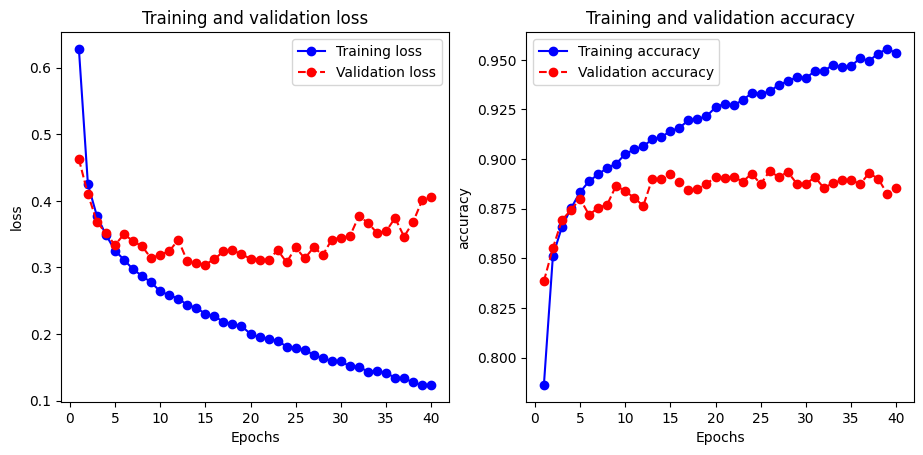

In [11]:
history_dict = history.history
multiplot(history)

As ve clearly see, the model overfits the training data significantly, achieving very high accuracy on the training set while the validation accuracy stagnates. This behavior is expected given our goal for this part of the practice. In the next part, we will implement regularization techniques to mitigate this overfitting and improve the model's generalization to unseen data.

Finally, we evaluate the model on the test dataset to determine its generalization performance.

In [16]:
# Print the evaluation metrics
print ("Classification Report:")
print_report(model)

Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.75      0.85      0.80      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.81      0.80      0.80      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.78      0.60      0.67      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



From the classification report, we can observe the precision, recall, and F1-score for each class in the Fashion-MNIST dataset. This detailed breakdown helps us understand how well the model performs on each category of clothing items.

We see that the model very high precision and recall for most classes, indicating that it is effective at correctly identifying the different types of clothing items in the test set. However, some classes may have slightly lower performance like the shirt, which could be due to similarities between certain clothing items or class imbalances in the dataset.

## Regularization techniques

In this part of the practice, we will implement regularization techniques to improve the generalization capabilities of our classical neural network model. Regularization helps prevent overfitting by adding constraints to the model during training. Some common regularization techniques include dropout, L1/L2 regularization, and early stopping. We will experiment with these techniques to find the best combination that enhances the model's performance on unseen data.

### Early Stopping Implementation

The early stopping mechanism is implemented to monitor the validation loss during training. If the validation loss does not improve for a specified number of consecutive epochs (patience), the training process is halted to prevent overfitting. This technique helps in maintaining the model's ability to generalize well on unseen data by stopping the training at the optimal point before overfitting occurs.

In [34]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
# Save the best model based on validation loss
# model_checkpoint = ModelCheckpoint(filepath="imdb.keras", save_best_only=True,monitor="val_loss")

Model: "model_early"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7864 - loss: 0.6194 - val_accuracy: 0.8447 - val_loss: 0.4517
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8540 - loss: 0.4162 - val_accuracy: 0.8567 - val_loss: 0.4044
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8673 - loss: 0.3722 - val_accuracy: 0.8619 - val_loss: 0.3916
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8759 - loss: 0.3438 - val_accuracy: 0.8734 - val_loss: 0.3481
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8845 - loss: 0.3240 - val_accuracy: 0.8734 - val_loss: 0.3467
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8875 - loss: 0.3098 - val_accuracy: 0.8810 - val_loss: 0.3297
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8920 - loss: 0.2963 - val_accuracy: 0.8846 - val_loss: 0.3203
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8954 - loss: 0.2867 - val_accuracy: 0.

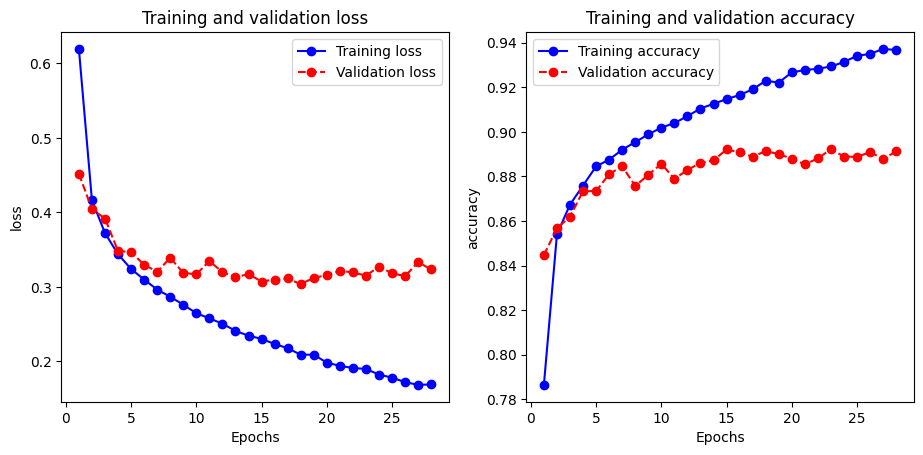

In [35]:
model_early = keras.Sequential(name='model_early')
model_early.add(layers.Input(shape=(28*28, )))
model_early.add(layers.Dense(100, activation = 'relu')) 
model_early.add(layers.Dense(100, activation = 'relu')) 

model_early.add(layers.Dense(10, name = 'output', activation = 'softmax'))
model_early.summary()

# Training setup
opt = keras.optimizers.Adam(learning_rate = 0.001)
model_early.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ["accuracy"])
history = model_early.fit(train_images,
                        train_labels,
                        epochs = 40,
                        batch_size = 200,
                        validation_data = (val_images, val_labels),
                        callbacks=[early_stop], # Adding "Early Stopping"
                        ) 
model_early.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print_report(model_early)
multiplot(history)

We see that with early stopping, the model halts training once the validation loss stops improving, which helps in preventing overfitting but not in a significant way. The training accuracy is still very high, while the validation accuracy shows a slight improvement compared to the previous model without regularization.

### Dropout, batch normalization, weight regularization and initialization
Some other regularization techniques that can be implemented are dropout, batch normalization, weight regularization and initialization.
- **Dropout**: Randomly drops a fraction of neurons during training to prevent co-adaptation of neurons.
- **Batch Normalization**: Normalizes the inputs of each layer to stabilize learning and improve convergence.
- **Weight Regularization**: Adds a penalty to the loss function based on the magnitude of the weights (L1 or L2 regularization).
- **Weight Initialization**: Proper initialization of weights can help in faster convergence and better performance and can be added to the model to further enhance its generalization capabilities.

#### Dropout Implementation with Early Stopping

Let us first implement dropout as well early stopping to the model and see how it performs.

Model: "model_early_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7093 - loss: 0.8232 - val_accuracy: 0.8285 - val_loss: 0.4774
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8172 - loss: 0.5179 - val_accuracy: 0.8476 - val_loss: 0.4211
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8402 - loss: 0.4528 - val_accuracy: 0.8600 - val_loss: 0.3842
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8485 - loss: 0.4255 - val_accuracy: 0.8688 - val_loss: 0.3610
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8557 - loss: 0.4029 - val_accuracy: 0.8675 - val_loss: 0.3600
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8600 - loss: 0.3910 - val_accuracy: 0.8698 - val_loss: 0.3504
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8627 - loss: 0.3788 - val_accuracy: 0.8753 - val_loss: 0.3435
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8665 - loss: 0.3695 - val_accuracy: 0.

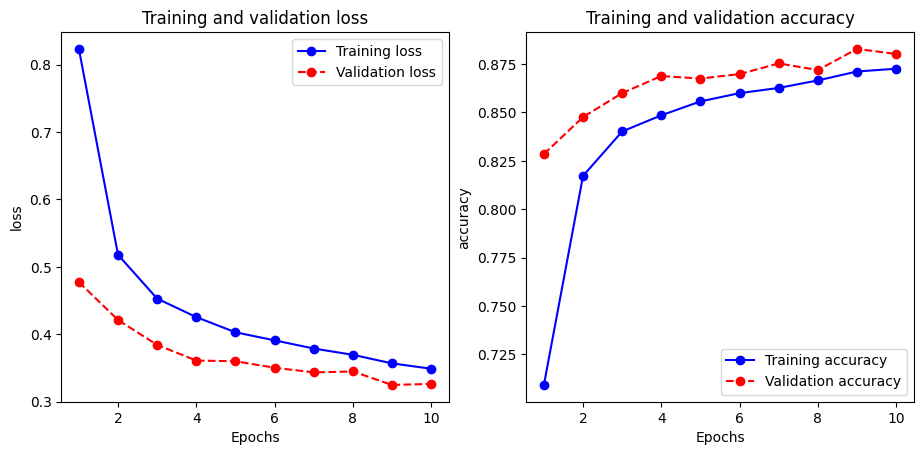

In [37]:
model_early_dropout = keras.Sequential(name='model_early_dropout')
model_early_dropout.add(layers.Input(shape=(28*28, )))
model_early_dropout.add(layers.Dense(100, activation = 'relu')) 
model_early_dropout.add(layers.Dropout(0.3)) # Adding Dropout layer
model_early_dropout.add(layers.Dense(100, activation = 'relu')) 
model_early_dropout.add(layers.Dropout(0.3))

model_early_dropout.add(layers.Dense(10, name = 'output', activation = 'softmax'))
model_early_dropout.summary()

# Training setup
opt = keras.optimizers.Adam(learning_rate = 0.001)
model_early_dropout.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ["accuracy"])
history = model_early_dropout.fit(train_images,
                        train_labels,
                        epochs = 40,
                        batch_size = 200,
                        validation_data = (val_images, val_labels),
                        callbacks=[early_stop], # Adding "Early Stopping"
                        ) 
model_early_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print_report(model_early_dropout)
multiplot(history)

#### Batch Normalization Implementation with Early Stopping

Model: "model_early_batchnorm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,410 (353.16 KB)

 Trainable params: 90,010 (351.60 KB)

 Non-trainable params: 400 (1.56 KB)

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8229 - loss: 0.5090 - val_accuracy: 0.8286 - val_loss: 0.4755
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8707 - loss: 0.3625 - val_accuracy: 0.8540 - val_loss: 0.3990
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8817 - loss: 0.3258 - val_accuracy: 0.8659 - val_loss: 0.3559
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8890 - loss: 0.3030 - val_accuracy: 0.8675 - val_loss: 0.3697
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8960 - loss: 0.2829 - val_accuracy: 0.8590 - val_loss: 0.3883
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9020 - loss: 0.2678 - val_accuracy: 0.8657 - val_loss: 0.3727
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9070 - loss: 0.2541 - val_accuracy: 0.8791 - val_loss: 0.3345
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9098 - loss: 0.2437 - val_accuracy: 0.

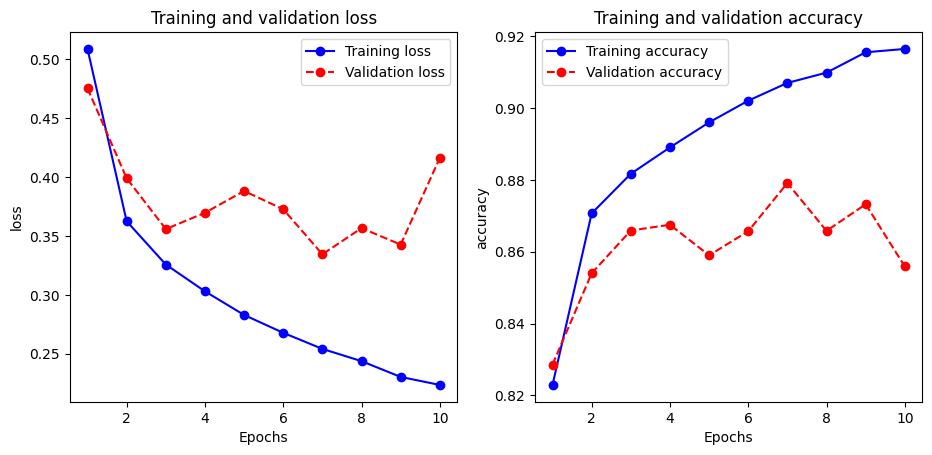

In [40]:
model_early_batchnorm = keras.Sequential(name='model_early_batchnorm')
model_early_batchnorm.add(layers.Input(shape=(28*28, ))) 
model_early_batchnorm.add(layers.Dense(100, activation = 'relu'))
model_early_batchnorm.add(layers.BatchNormalization()) # Adding Batch Normalization
model_early_batchnorm.add(layers.Dense(100, activation = 'relu'))
model_early_batchnorm.add(layers.BatchNormalization()) # Adding Batch Normalization
model_early_batchnorm.add(layers.Dense(10, name = 'output', activation = 'softmax'))
model_early_batchnorm.summary()

# Training setup
opt = keras.optimizers.Adam(learning_rate = 0.001)  
model_early_batchnorm.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ["accuracy"])
history = model_early_batchnorm.fit(train_images,
                        train_labels,
                        epochs = 40,
                        batch_size = 200,
                        validation_data = (val_images, val_labels),
                        callbacks=[early_stop], # Adding "Early Stopping"
                        )
model_early_batchnorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print_report(model_early_batchnorm)
multiplot(history)

In this case batchnormalization layers make the model perform worse. This could be due to the fact that the dataset is relatively simple, and the added complexity of batch normalization may not be necessary. Additionally, the interaction between batch normalization and early stopping might not be optimal in this specific configuration.

#### Weight Regularization Implementation with Early Stopping

Model: "model_early_weight"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7360 - loss: 4.0234 - val_accuracy: 0.7755 - val_loss: 1.3705
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7882 - loss: 1.1523 - val_accuracy: 0.8005 - val_loss: 1.0231
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7954 - loss: 0.9734 - val_accuracy: 0.8041 - val_loss: 0.9199
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8040 - loss: 0.8886 - val_accuracy: 0.8116 - val_loss: 0.8530
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8099 - loss: 0.8327 - val_accuracy: 0.8088 - val_loss: 0.8170
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8157 - loss: 0.7947 - val_accuracy: 0.8181 - val_loss: 0.7776
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8187 - loss: 0.7622 - val_accuracy: 0.8244 - val_loss: 0.7465
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8221 - loss: 0.7387 - val_accuracy: 0.

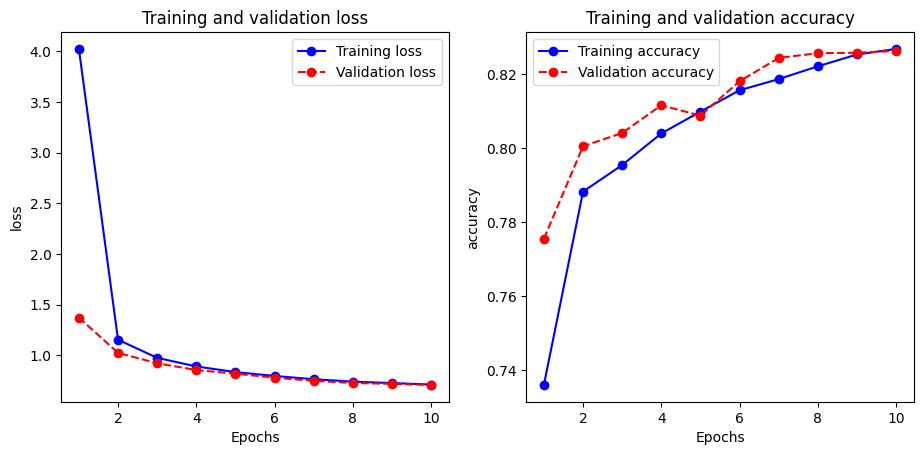

In [43]:
from keras import regularizers

model_early_weight = keras.Sequential(name='model_early_weight')
model_early_weight.add(layers.Input(shape=(28*28, )))
model_early_weight.add(layers.Dense(100, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))  # Adding Weight Regularization
model_early_weight.add(layers.Dense(100, activation = 'relu', kernel_regularizer=regularizers.l1(0.01))) # Adding Weight Regularization

model_early_weight.add(layers.Dense(10, name = 'output', activation = 'softmax'))
model_early_weight.summary()

# Training setup
opt = keras.optimizers.Adam(learning_rate = 0.001)
model_early_weight.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ["accuracy"])
history = model_early_weight.fit(train_images,
                        train_labels,
                        epochs = 40,
                        batch_size = 200,
                        validation_data = (val_images, val_labels),
                        callbacks=[early_stop], # Adding "Early Stopping"
                        ) 
model_early_weight.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print_report(model_early_weight)
multiplot(history)

# Conclusions

Comment on the results obtained by each model.
- Make a reasoned comparison of the results obtained, where they have improved,
worsened, etc.
- Comment advantages, disadvantages of the different methods, conclusions
obtained and other aspects of interest.
- It is advisable to include a final graph or table summarizing all the results
obtained by the different models.